In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving download1.jpg to download1.jpg


In [ ]:
image = cv2.imread('download1.jpg')

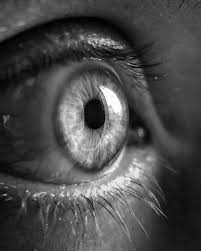

In [ ]:
cv2_imshow(image)

In [ ]:
greyscale_image = cv2.imread('download1.jpg',cv2.IMREAD_GRAYSCALE)

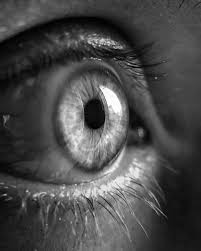

In [ ]:
cv2_imshow(greyscale_image)

In [ ]:
row_size, column_size = greyscale_image.shape

In [ ]:
def convert_binary(image) :
  arr = []
  for i in range(row_size) :
    for j in range(column_size) :
      arr.append(np.binary_repr(image[i][j], width=8))
  return arr

In [ ]:
def get_bit_plane(plane_index, image) :
  bit_arr = [int(pixel[plane_index]) for pixel in image]
  return np.array(bit_arr)

In [ ]:
def get_weighted_bit_plane(plane_index, image) :
  wt = 2**(7 - plane_index)
  return image*wt

In [ ]:
image = convert_binary(greyscale_image)

In [ ]:
bit_plane_0 = get_weighted_bit_plane(0, get_bit_plane(0,image))
bit_plane_1 = get_weighted_bit_plane(1, get_bit_plane(1,image))
bit_plane_2 = get_weighted_bit_plane(2, get_bit_plane(2,image))
bit_plane_3 = get_weighted_bit_plane(3, get_bit_plane(3,image))
bit_plane_4 = get_weighted_bit_plane(4, get_bit_plane(4,image))
bit_plane_5 = get_weighted_bit_plane(5, get_bit_plane(5,image))
bit_plane_6 = get_weighted_bit_plane(6, get_bit_plane(6,image))
bit_plane_7 = get_weighted_bit_plane(7, get_bit_plane(7,image))

In [ ]:
def get_combination(*bitplanes) :
  result = bitplanes[0]
  for plane in bitplanes[1:] :
    result = result + plane
  return result

In [ ]:
image0 = get_combination(bit_plane_0)
img0 = np.reshape(image0, (row_size, column_size))

In [ ]:
image1 = get_combination(image0,bit_plane_1)
img1 = np.reshape(image1, (row_size, column_size))

In [ ]:
image2 = get_combination(image1,bit_plane_2)
img2 = np.reshape(image2, (row_size, column_size))

In [ ]:
image3 = get_combination(image2,bit_plane_3)
img3 = np.reshape(image3, (row_size, column_size))

In [ ]:
image4 = get_combination(image3,bit_plane_4)
img4 = np.reshape(image4, (row_size, column_size))

In [ ]:
image5 = get_combination(image4,bit_plane_5)
img5 = np.reshape(image5, (row_size, column_size))

In [ ]:
image6 = get_combination(image5,bit_plane_6)
img6 = np.reshape(image6, (row_size, column_size))

In [ ]:
image7 = get_combination(image6,bit_plane_7)
img7 = np.reshape(image7, (row_size, column_size))

In [ ]:
img0 = cv2.resize(img0, (300,300), interpolation = cv2.INTER_NEAREST)
img1 = cv2.resize(img1, (300,300), interpolation = cv2.INTER_NEAREST)
img2 = cv2.resize(img2, (300,300), interpolation = cv2.INTER_NEAREST)
img3 = cv2.resize(img3, (300,300), interpolation = cv2.INTER_NEAREST)
img4 = cv2.resize(img4, (300,300), interpolation = cv2.INTER_NEAREST)
img5 = cv2.resize(img5, (300,300), interpolation = cv2.INTER_NEAREST)
img6 = cv2.resize(img6, (300,300), interpolation = cv2.INTER_NEAREST)
img7 = cv2.resize(img7, (300,300), interpolation = cv2.INTER_NEAREST)

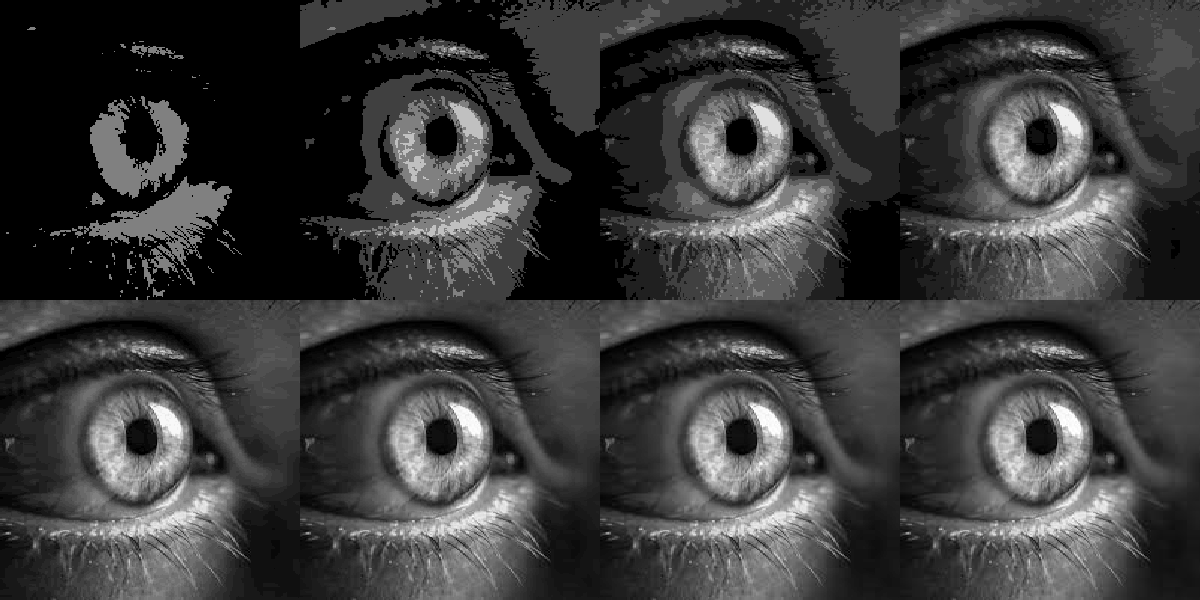

In [ ]:
horizontal1 = np.concatenate((img0,img1,img2,img3), axis = 1)
horizontal2 = np.concatenate((img4,img5,img6,img7), axis = 1)
final = np.concatenate((horizontal1,horizontal2), axis = 0)
cv2_imshow(final)